# Import player character data from file, print examples

In [1]:
import json
import math

# Path to your JSON file
json_file_path = 'player_character_counts.json'

# Read the JSON data from the file
with open(json_file_path, 'r') as file:
    data = json.load(file)


# Iterate over each player's data
for player_data in data.values():
    # Get the total number of characters played by the player
    total_characters_played = sum(player_data.values())
    
    # Find the most played character and its frequency
    most_played_character = max(player_data, key=player_data.get)
    most_played_character_count = player_data[most_played_character]
    most_played_character_frequency = most_played_character_count / total_characters_played
    
    # Calculate uncertainty using Poissonian statistics
    uncertainty = (most_played_character_frequency)*math.sqrt((1/most_played_character_count) + (1/total_characters_played))
    
    # Update the dictionary for the player with most played character info and uncertainty
    player_data["most_played_character"] = most_played_character
    player_data["most_played_character_frequency"] = most_played_character_frequency
    player_data["uncertainty"] = uncertainty
    player_data["total_games_recorded"] = total_characters_played

# Print the updated data, including uncertainties
# Iterate over a subset of players, e.g., the first few players
num_players_to_print = 5
for player_code, player_data in list(data.items())[:num_players_to_print]:
    print(f"Player Code: {player_code}")
    print(f"  Most Played Character: {player_data['most_played_character']}")
    print(f"  Most Played Character Frequency: {player_data['most_played_character_frequency']:.2f}")
    print(f"  Uncertainty: {player_data['uncertainty']:.2f}")
    print(f"  Total Games Recorded: {player_data['total_games_recorded']}")
    print()

Player Code: GEFF#353
  Most Played Character: FOX
  Most Played Character Frequency: 0.17
  Uncertainty: 0.01
  Total Games Recorded: 4690

Player Code: NADR#499
  Most Played Character: FOX
  Most Played Character Frequency: 0.86
  Uncertainty: 0.48
  Total Games Recorded: 7

Player Code: CHAN#147
  Most Played Character: FALCO
  Most Played Character Frequency: 0.50
  Uncertainty: 0.22
  Total Games Recorded: 16

Player Code: FRO#192
  Most Played Character: MARTH
  Most Played Character Frequency: 0.98
  Uncertainty: 0.13
  Total Games Recorded: 117

Player Code: RYGU#334
  Most Played Character: FALCO
  Most Played Character Frequency: 0.73
  Uncertainty: 0.11
  Total Games Recorded: 97



# Define uncertainty function for normalized character frequency *

In [15]:
def compute_uncertainty(dictionary, key):
    N = sum(dictionary.values())
    n_i = dictionary[key]
    
    inner_sum = 0
    for j in dictionary:
        n_j = dictionary[j]
        if (n_j != n_i):
            inner_sum += n_j * (n_i / N ** 2) ** 2
    
    uncertainty = (n_i * ((N - n_i) / N ** 2) ** 2 + inner_sum) ** 0.5
    
    print(key, n_i/N, uncertainty)

In [24]:
def compute_uncertainty2(dictionary, key):
    N = sum(dictionary.values())
    n_i = dictionary[key]
    
    
    uncertainty = (n_i*(N-n_i)/(N**3)) ** 0.5
    
    print(key, n_i/N, uncertainty)

# Cut out players with no clear main, compute main distribution and uncertainty

In [26]:
import math

# Define the threshold parameters
alpha = 0.5
beta = 0
N = 5  # Minimum number of games played

# Initialize a dictionary to store the total number of players for each character
character_player_counts = {}

# Iterate over each player's data
for player_data in data.values():
    # Check if the player's most played character frequency meets the condition
    if ((player_data["most_played_character_frequency"] - beta * player_data["uncertainty"]) > alpha) and (player_data["total_games_recorded"] > N):
        # Get the most played character for the player
        most_played_character = player_data["most_played_character"]
        
        # Increment the count for the most played character in the character_player_counts dictionary
        character_player_counts[most_played_character] = character_player_counts.get(most_played_character, 0) + 1

# Calculate total number of players without cuts
total_players = len(data)

# Calculate total number of players after cuts
sum_of_character_player_counts = sum(character_player_counts.values())

# Convert counts to percentage format
character_player_percentages = {character: count / sum_of_character_player_counts for character, count in character_player_counts.items()}

# Calculate uncertainty for each character
character_uncertainties = {}
for character, count in character_player_counts.items():
    if count > 0:
        compute_uncertainty2()
        uncertainty = (count / sum_of_character_player_counts) * math.sqrt(1 / count - 1 / sum_of_character_player_counts)
        character_uncertainties[character] = uncertainty
    else:
        character_uncertainties[character] = 0

# Print the dictionary showing the total number of players for each character
print("Total Number of Players for Each Character:")
print(character_player_counts)

# Print the dictionary showing the total number of players for each character in percentage format
print("\nTotal Number of Players for Each Character (Normalized Format):")
print(character_player_percentages)

# Print uncertainties for each character
print("\nUncertainty in normalized frequency for Each Character:")
print(character_uncertainties)

# Print total number of keys in player_data
print("\nTotal Number of Keys in player_data:")
print(total_players)

# Print sum of all values in character_player_counts
print("\nSum of All Values in character_player_counts:")
print(sum_of_character_player_counts)

# Print value of sum of all values in character_player_counts divided by the total number of keys in player_data
print("\nProportion of Players remaining after cuts:")
print(sum_of_character_player_counts / total_players)


Total Number of Players for Each Character:
{'FOX': 4849, 'MARTH': 3429, 'FALCO': 6539, 'LUIGI': 430, 'SHEIK': 1449, 'PEACH': 847, 'GAME_AND_WATCH': 132, 'CAPTAIN_FALCON': 3272, 'GANONDORF': 506, 'YOSHI': 214, 'JIGGLYPUFF': 598, 'PIKACHU': 188, 'ICE_CLIMBERS': 169, 'DR_MARIO': 252, 'MARIO': 113, 'YOUNG_LINK': 101, 'BOWSER': 38, 'LINK': 150, 'NESS': 63, 'SAMUS': 474, 'DONKEY_KONG': 67, 'ROY': 96, 'MEWTWO': 53, 'PICHU': 16, 'ZELDA': 35, 'KIRBY': 21}

Total Number of Players for Each Character (Normalized Format):
{'FOX': 0.2011949711630223, 'MARTH': 0.14227625409734035, 'FALCO': 0.2713165428820381, 'LUIGI': 0.017841583336791006, 'SHEIK': 0.060121986639558526, 'PEACH': 0.03514376996805112, 'GAME_AND_WATCH': 0.005476951163852123, 'CAPTAIN_FALCON': 0.13576200157669807, 'GANONDORF': 0.020994979461433135, 'YOSHI': 0.008879299614123896, 'JIGGLYPUFF': 0.02481224845442098, 'PIKACHU': 0.007800506203062114, 'ICE_CLIMBERS': 0.007012157171901581, 'DR_MARIO': 0.01045599767644496, 'MARIO': 0.004688602

# Compute Distribution and Uncertainty for Top 100 Character Mains

In [27]:
# Define the path to the file
file_path = "2023_top_100.txt"

# Initialize an empty dictionary to store the frequencies
character_frequencies = {}

# Read the file line by line
with open(file_path, 'r') as file:
    for line in file:
        # Split each line into rank and character
        rank, character = line.strip().split(maxsplit=1)
        
        # Convert rank to integer
        rank = int(rank)
        
        # Check if the character is already in the dictionary
        if character in character_frequencies:
            # Increment the frequency count for the character
            character_frequencies[character] += 1
        else:
            # Add the character to the dictionary with a frequency of 1
            character_frequencies[character] = 1

# Print the resulting dictionary
top_100_frequencies = character_frequencies

# All characters
all_characters = [
    'FOX', 'MARTH', 'JIGGLYPUFF', 'FALCO', 'SHEIK', 'CAPTAIN_FALCON',
    'PEACH', 'ICE_CLIMBERS', 'PIKACHU', 'YOSHI', 'SAMUS', 'LUIGI',
    'DR_MARIO', 'GANONDORF', 'DONKEY_KONG', 'GAME_AND_WATCH', 'LINK',
    'YOUNG_LINK', 'BOWSER', 'NESS', 'ROY', 'MEWTWO', 'PICHU', 'ZELDA',
    'KIRBY', 'MARIO'
]

# Initialize frequencies for all characters
top_100_character_frequencies = {character: 0 for character in all_characters}

# Update frequencies for top 100 characters
for character, frequency in top_100_frequencies.items():
    top_100_character_frequencies[character] = frequency

# Total count of characters
total_characters = sum(top_100_character_frequencies.values())

# Compute percentage dictionary
top_100_character_player_percentage = {character: (frequency / total_characters) for character, frequency in top_100_character_frequencies.items()}

# Calculate uncertainty for each character
top_100_character_uncertainties = {}
for character, count in top_100_character_frequencies.items():
    if count > 0:
        uncertainty = (count / total_characters) * math.sqrt(1 / count - 1 / total_characters)
        top_100_character_uncertainties[character] = uncertainty
    else:
        top_100_character_uncertainties[character] = 0

# Print the dictionaries
print("Frequencies for all characters in top 100:")
print(top_100_character_frequencies)
print("\nNormalized frequency of each character in top 100:")
print(top_100_character_player_percentage)
# Print uncertainties for each character
print("\nUncertainty in normalized frequency for Each Character:")
print(top_100_character_uncertainties)

# Print sum of all values in character_player_counts
print("\nSum of All Values in character_player_counts:")
sum_of_character_player_counts = sum(top_100_character_frequencies.values())
print(sum_of_character_player_counts)


Frequencies for all characters in top 100:
{'FOX': 28, 'MARTH': 8, 'JIGGLYPUFF': 9, 'FALCO': 13, 'SHEIK': 11, 'CAPTAIN_FALCON': 7, 'PEACH': 7, 'ICE_CLIMBERS': 2, 'PIKACHU': 3, 'YOSHI': 2, 'SAMUS': 3, 'LUIGI': 2, 'DR_MARIO': 1, 'GANONDORF': 1, 'DONKEY_KONG': 3, 'GAME_AND_WATCH': 0, 'LINK': 0, 'YOUNG_LINK': 0, 'BOWSER': 0, 'NESS': 0, 'ROY': 0, 'MEWTWO': 0, 'PICHU': 0, 'ZELDA': 0, 'KIRBY': 0, 'MARIO': 0}

Normalized frequency of each character in top 100:
{'FOX': 0.28, 'MARTH': 0.08, 'JIGGLYPUFF': 0.09, 'FALCO': 0.13, 'SHEIK': 0.11, 'CAPTAIN_FALCON': 0.07, 'PEACH': 0.07, 'ICE_CLIMBERS': 0.02, 'PIKACHU': 0.03, 'YOSHI': 0.02, 'SAMUS': 0.03, 'LUIGI': 0.02, 'DR_MARIO': 0.01, 'GANONDORF': 0.01, 'DONKEY_KONG': 0.03, 'GAME_AND_WATCH': 0.0, 'LINK': 0.0, 'YOUNG_LINK': 0.0, 'BOWSER': 0.0, 'NESS': 0.0, 'ROY': 0.0, 'MEWTWO': 0.0, 'PICHU': 0.0, 'ZELDA': 0.0, 'KIRBY': 0.0, 'MARIO': 0.0}

Uncertainty in normalized frequency for Each Character:
{'FOX': 0.0448998886412873, 'MARTH': 0.027129319932501072, '

# Compute the ratio of top 100 character distribution over "global" character distribution

In [28]:
# Initialize an empty dictionary to store the ratio
ratio_dict = {}

# Iterate through each character present in both dictionaries
for character in top_100_frequencies.keys():
    # Check if the character exists in both dictionaries
    if character in top_100_character_player_percentage and character in character_player_percentages:
        # Compute the ratio
        ratio = top_100_character_player_percentage[character] / character_player_percentages[character]
        # Add the ratio to the dictionary
        ratio_dict[character] = ratio

# Calculate uncertainty for each character
ratio_uncertainties = {}
for character, ratio in ratio_dict.items():
    
    if (top_100_character_player_percentage[character] > 0 and character_uncertainties[character]/character_player_percentages[character] > 0):
        uncertainty = ratio * math.sqrt((top_100_character_uncertainties[character]/top_100_character_player_percentage[character])**2 + (character_uncertainties[character]/character_player_percentages[character])**2)
        ratio_uncertainties[character] = uncertainty
    else:
        ratio_uncertainties[character] = 0
        
# Print the resulting ratio dictionary
print("Ratio of top 100 frequency/global frequency:")
print(ratio_dict)
# Print the resulting ratio uncertainty dictionary
print("uncertainty in ratio:")
print(ratio_uncertainties)

# Sort the ratio dictionary by values in descending order
sorted_ratios = sorted(ratio_dict.items(), key=lambda x: x[1], reverse=True)

# Print the sorted ratios
print()
print("Sorted ratios from greatest to least:")
for character, ratio in sorted_ratios:
    print(f"{character}: {ratio} +/- {ratio_uncertainties[character]}")


Ratio of top 100 frequency/global frequency:
{'FOX': 1.3916848834811302, 'MARTH': 0.5622863808690581, 'SHEIK': 1.8296135265700482, 'YOSHI': 2.252429906542056, 'JIGGLYPUFF': 3.627240802675585, 'FALCO': 0.4791451292246521, 'CAPTAIN_FALCON': 0.5156081907090465, 'PEACH': 1.9918181818181822, 'SAMUS': 1.525379746835443, 'PIKACHU': 3.845904255319149, 'DONKEY_KONG': 10.791492537313433, 'ICE_CLIMBERS': 2.8521893491124257, 'GANONDORF': 0.476304347826087, 'LUIGI': 1.1209767441860465, 'DR_MARIO': 0.956388888888889}
uncertainty in ratio:
{'FOX': 0.22387976260670456, 'MARTH': 0.19088785240901682, 'SHEIK': 0.5225067763126827, 'YOSHI': 1.5841347781828168, 'JIGGLYPUFF': 1.1626529550142692, 'FALCO': 0.12405558139644736, 'CAPTAIN_FALCON': 0.1881237125574454, 'PEACH': 0.7291150734382531, 'SAMUS': 0.8701372916321041, 'PIKACHU': 2.2046492766987162, 'DONKEY_KONG': 6.275948467692872, 'ICE_CLIMBERS': 2.0084672424648726, 'GANONDORF': 0.4743797126324145, 'LUIGI': 0.7865104596357604, 'DR_MARIO': 0.953480277278108

# Visualize the Results with an error bar plot

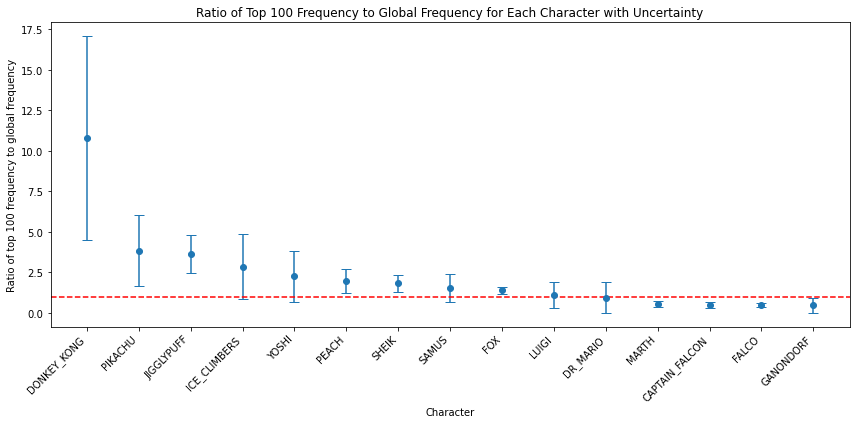

In [29]:
import matplotlib.pyplot as plt

# Set plot background to white
plt.rcParams['figure.facecolor'] = 'white'

# Characters and their ratios
characters = sorted_ratios
ratios = [ratio for character, ratio in sorted_ratios]
errors = [ratio_uncertainties[character] for character, ratio in sorted_ratios]

# Plot
plt.figure(figsize=(12, 6))
plt.errorbar(range(len(characters)), ratios, yerr=errors, fmt='o', capsize=5)
plt.axhline(y=1.0, color='r', linestyle='--')  # Add horizontal line at y=1.0
plt.xticks(range(len(characters)), [character for character, ratio in sorted_ratios], rotation=45, ha='right')
plt.xlabel('Character')
plt.ylabel('Ratio of top 100 frequency to global frequency')
plt.title('Ratio of Top 100 Frequency to Global Frequency for Each Character with Uncertainty')
plt.tight_layout()
plt.show()
